# Capstone Project 1: Hyperparameter Tuning:

In [51]:
# Import libraries:
import pandas as pd #for building pandas dataframes for analysis
import numpy as np #fundamental package for scientific computing with Python

# Plotting/Visualizations:
import seaborn as sns #for neat visualizations
import matplotlib.pyplot as plt #for visualizations
import datetime
import pylab as P

# Classical Stats Modeling:
import statsmodels.api as sm #provides estimation of many different statistical models, tests and data exploration 
import scipy.stats as stats #large number of probability distributions and statistical functions

# Supervised Learning:
from sklearn.model_selection import train_test_split #for performing train test split analysis
from sklearn.linear_model import LinearRegression #for performing linear regression
from sklearn.metrics import r2_score # Calculte R^2
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [52]:
#Cleaned Data w/o Accommodates
filtered_result4 = pd.read_csv('/Users/carolinerosefrensko/Downloads/data_wrangling_json/AirBNB_cleaned_dataChicagoprice_filtered_result_4_2018-07-20.csv')
filtered_result4.head()

,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
0,3.0,2.0,5.0,98.0,186,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,4.0,4.5,296.0,46,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,3.0,5.0,108.0,50,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,4.0,4.5,217.0,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1.0,4.5,433.0,34,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
filtered_result4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90355 entries, 0 to 90354
Columns: 197 entries, bedrooms to neighborhood_Wrigleyville
dtypes: float64(4), int64(193)
memory usage: 135.8 MB


In [54]:
filtered_result4.describe()

,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
count,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,...,90355.00000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000
mean,1.284655,1.601561,4.763306,113.129910,27.231111,0.569465,0.394677,0.035859,0.011455,0.005423,...,0.00010,0.009673,0.037917,0.001760,0.024758,0.000022,0.004814,0.000166,0.009640,0.011278
std,0.750933,5.301876,0.348055,75.677914,35.624350,0.495154,0.488784,0.185938,0.106413,0.073442,...,0.00998,0.097875,0.190997,0.041912,0.155387,0.004705,0.069219,0.012884,0.097708,0.105597
min,0.000000,1.000000,0.000000,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,4.500000,63.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,5.000000,95.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,5.000000,140.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,365.000000,5.000000,500.000000,427.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Random Forest

In [55]:
#Filtering out Price Column out of X
X = filtered_result4.drop('price', axis = 1)
names = filtered_result4.drop('price', axis = 1).columns

#Price Column
Y = filtered_result4.price

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 42)
regr_forest = RandomForestRegressor()

#Fitting Random Forest using Sklearn
model = regr_forest.fit(X_train, y_train)
y_pred_test = regr_forest.predict(X_test)
y_pred_train = regr_forest.predict(X_train)

print('Train Set')
print('Random Forest R squared Train: %.4f' % regr_forest.score(X_train, y_train))
forest_mse = mean_squared_error(y_pred_train, y_train)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE Train: %.4f' % forest_rmse)
lin_mae = mean_absolute_error(y_pred_train, y_train)
print('Random Forest MAE Train Set: %.4f' % lin_mae)  

print('Test Set')
print('Random Forest R squared Test Set: %.4f' % regr_forest.score(X_test, y_test))
forest_mse = mean_squared_error(y_pred_test, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE Test Set: %.4f' % forest_rmse)
lin_mae = mean_absolute_error(y_pred_test, y_test)
print('Random Forest MAE Test Set: %.4f' % lin_mae)


Train Set
Random Forest R squared Train: 0.8392
Random Forest RMSE Train: 30.2182
Random Forest MAE Train Set: 16.6190
Test Set
Random Forest R squared Test Set: 0.6939
Random Forest RMSE Test Set: 42.5645
Random Forest MAE Test Set: 24.8735


#### Feature Importance Analysis:

In [56]:
#Filtering out Price Column out of X
X = filtered_result4.drop('price', axis = 1)
names = filtered_result4.drop('price', axis = 1).columns

#Overall_Satisfaction Column
Y = filtered_result4.price

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 42)

#Fitting Random Forest using Sklearn
regr_forest.fit(X_train, y_train)
y_pred_test = regr_forest.predict(X_test)
y_pred_train = regr_forest.predict(X_train)

In [57]:
importances = pd.DataFrame({'feature':names,'importance':np.round(regr_forest.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances[0:30])

                                     importance
feature                                        
room_type_Entire home/apt                0.3311
reviews                                  0.1933
bedrooms                                 0.1397
minstay                                  0.0473
overall_satisfaction                     0.0383
neighborhood_Near North                  0.0169
neighborhood_The Loop                    0.0120
neighborhood_Gold Coast                  0.0105
neighborhood_South Loop                  0.0099
neighborhood_River North                 0.0096
neighborhood_Old Town                    0.0086
neighborhood_Near East Side              0.0086
neighborhood_Lake View East              0.0069
neighborhood_Logan Square                0.0058
neighborhood_Lake View                   0.0057
neighborhood_Roscoe Village              0.0053
neighborhood_Old Town Triangle           0.0052
neighborhood_Lincoln Park                0.0050
neighborhood_Humboldt Park              

#### Training data set 

In [58]:
#Filtering X
#X = filtered_result4[['room_type_Entire home/apt','bedrooms','neighborhood_Near North','neighborhood_The Loop','overall_satisfaction','reviews','room_type_Private room','neighborhood_River North','room_type_Shared room','neighborhood_Near East Side','neighborhood_South Loop','neighborhood_Old Town Triangle','neighborhood_Old Town','neighborhood_Gold Coast','minstay','neighborhood_Illinois Medical District','neighborhood_North Center','neighborhood_Uptown','neighborhood_Near West Side','neighborhood_Heart of Chicago','neighborhood_Hyde Park','neighborhood_Streeterville','neighborhood_Sheridan Park','neighborhood_East Pilsen','neighborhood_Lake View','neighborhood_West Town']]


In [59]:
#from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]

# Number of features to consider at every split
#max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
#bootstrap = [True, False]

# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}
#print(random_grid)


In [70]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

#Filtering out Price Column out of X
#X = filtered_result4.drop('price', axis = 1)

#Overall_Satisfaction Column
#Y = filtered_result4.price

#Train/Test Split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 42)

# Fit the random search model
#rf_random.fit(X_train, y_train)

#See Results At The Bottom

In [61]:
#rf_random.best_params_

In [ ]:
rf_random.best_params_
{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

Tested: {'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}

#### Evaluate the model with best hyperparameters

Train Set
Random Forest R squared Train: 0.8294
Random Forest RMSE Train: 31.1218
Random Forest MAE Train Set: 18.2354
Test Set
Random Forest R squared Test Set: 0.7165
Random Forest RMSE Test Set: 40.9667
Random Forest MAE Test Set: 24.6995


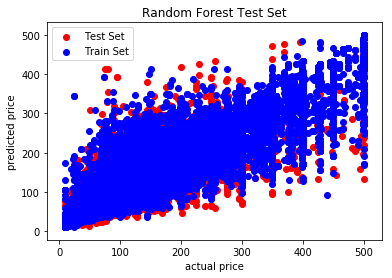

In [62]:
#Filtering out Price Column out of X
X = filtered_result4.drop('price', axis = 1)
names = filtered_result4.drop('price', axis = 1).columns

#Price Column
Y = filtered_result4.price

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 42)
regr_forest = RandomForestRegressor(bootstrap = True, 
                                    max_depth = 100,
                                    max_features = 'sqrt', 
                                    min_samples_leaf = 1,
                                    min_samples_split = 5, 
                                    n_estimators = 500,
                                    random_state=42)

#Fitting Random Forest using Sklearn
regr_forest.fit(X_train, y_train)
y_pred_test = regr_forest.predict(X_test)
y_pred_train = regr_forest.predict(X_train)


print('Train Set')
print('Random Forest R squared Train: %.4f' % regr_forest.score(X_train, y_train))
forest_mse = mean_squared_error(y_pred_train, y_train)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE Train: %.4f' % forest_rmse)
lin_mae = mean_absolute_error(y_pred_train, y_train)
print('Random Forest MAE Train Set: %.4f' % lin_mae)

print('Test Set')
print('Random Forest R squared Test Set: %.4f' % regr_forest.score(X_test, y_test))
forest_mse = mean_squared_error(y_pred_test, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE Test Set: %.4f' % forest_rmse)
lin_mae = mean_absolute_error(y_pred_test, y_test)
print('Random Forest MAE Test Set: %.4f' % lin_mae)

plt.scatter(x=y_test, y=y_pred_test, color='red', label="Test Set")
plt.scatter(x=y_train, y=y_pred_train, color= 'blue', label="Train Set")
plt.legend()
plt.title('Random Forest Test Set')
plt.ylabel('predicted price')
plt.xlabel('actual price')
plt.show()

#### Compare Performance

In [63]:
def get_performance_metrics(model_name, y_test, y_pred_test):
    '''Build a dictionary of regression model performance metrics: R2, MSE, and MAE'''
    metrics = {}
    metrics = {'Model': model_name, 'R2': r2_score(y_test, y_pred_test), 
               'RMSE': root_mean_squared_error(mean_squared_error, y_test, y_pred_test),
               'Bias': forcast_bias(y_pred_test, y_test)}
    return (metrics)

In [64]:
def root_mean_squared_error(mean_squared_error, y_test, y_pred_test):
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
    return RMSE

In [65]:
def forcast_bias(y_test, y_pred_test):
    bias = np.mean(y_test - y_pred_test)
    return bias

In [66]:
#Filtering out Price Column out of X
X = filtered_result4.drop('price', axis = 1)

#Overall_Satisfaction Column
Y = filtered_result4.price

models = []

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 42)

In [67]:
rfr = get_performance_metrics('Random Forest', y_test, RandomForestRegressor(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_test))
models.append(rfr)

In [68]:
rfr2 = get_performance_metrics('Random Forest Hyperparameters Tuned', y_test, RandomForestRegressor(bootstrap = True, 
                                    max_depth = 100,
                                    max_features = 'sqrt', 
                                    min_samples_leaf = 1,
                                    min_samples_split = 5, 
                                    n_estimators = 500,
                                    random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_test))
models.append(rfr2)

In [69]:
#Test Set Values
df_models = pd.DataFrame(models).set_index('Model')
df_models = df_models[['R2', 'RMSE', 'Bias']]
df_models.sort_values('R2', ascending=False)


,R2,RMSE,Bias
Model,,,
Random Forest Hyperparameters Tuned,0.716490,40.966734,-0.199421
Random Forest,0.694443,42.529798,-0.211461


#### Results from random grid to search for best hyperparameters:

In [14]:
#Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=  46.4s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total= 1.1min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total= 1.1min
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total= 1.1min
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=  38.3s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=  30.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=  29.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=  31.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=  28.8s
[CV] n_estimators=433, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=  27.3s
[CV] n_estimators=433, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=  28.2s
[CV] n_estimators=433, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=  38.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.4min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.3min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.2min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total= 2.6min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total= 2.4min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total= 2.3min
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=14.6min
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=14.7min
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=14.8min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total= 1.8min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total= 1.9min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total= 1.9min
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total= 5.7min
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=11.9min
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=11.9min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total= 5.5min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=11.9min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total= 7.6min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total= 8.1min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total= 8.2min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total= 8.2min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 39.0min
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total= 3.3min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.0min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  55.8s
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  55.6s
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total= 3.2min
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total= 3.2min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=  49.5s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=  49.0s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=  51.9s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.7min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.7min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.7min
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total=15.0min
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=23.4min
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=23.5min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=23.6min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.2min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.2min
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.3min
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total=15.0min
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total=14.7min
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total= 9.9min
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, total=26.1min
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, total=26.3min
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total= 3.2min
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, total=25.8min
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=10.4min
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total= 3.0min
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total= 3.1min
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=10.6min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total= 4.7min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total= 4.7min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total= 2.3min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total= 4.7min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total= 2.2min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total= 2.2min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total= 4.4min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total= 4.5min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total= 4.5min
[CV] n_estimators=233, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=18.0min
[CV] n_estimators=233, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=18.1min
[CV] n_estimators=233, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=17.9min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total= 3.0min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total= 3.0min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total= 2.9min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.1min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.1min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.0min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=18.7min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=19.0min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=18.9min
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.2min
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.3min
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.1min
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total= 1.1min
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total= 1.1min
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total= 1.1min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total= 1.9min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=25.3min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total= 1.9min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total= 1.9min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total= 2.4min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total= 2.4min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.2min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total= 2.5min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.1min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.2min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 2.0min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=22.1min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=21.1min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 2.0min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  55.4s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  55.3s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  56.8s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.9min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=  51.9s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=  51.0s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=  50.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total= 9.6min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total= 9.7min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total= 9.6min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total= 9.3min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total= 1.7min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total= 1.7min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total= 1.6min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total= 1.9min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total= 1.8min
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total= 1.8min
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total= 1.4min
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total= 1.5min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total= 1.5min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.6min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total= 9.0min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total= 9.1min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.2min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.6min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.2min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.6min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.2min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total= 2.6min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total= 2.6min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total= 9.6min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total= 2.6min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total= 9.8min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total= 9.5min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total= 1.8min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total= 1.8min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total= 1.8min
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total= 2.7min
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total= 2.8min
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total= 2.8min
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total= 2.4min
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=17.1min
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=17.0min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=17.2min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total= 2.3min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total= 2.3min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=12.2min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=12.3min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=12.6min
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=21.0min
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 242.2min
[CV]  n_estimators=333, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=12.9min
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=19.8min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=19.7min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=13.0min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=14.1min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=12.4min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=12.6min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total= 3.6min
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total= 2.1min
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total= 3.8min
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total= 3.8min
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=12.5min
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total= 2.1min
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total= 2.1min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total= 5.1min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total= 5.0min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total= 5.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=16.6min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=16.5min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=14.7min
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=16.4min
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total= 2.2min
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total= 2.2min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.3min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total= 2.1min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.2min
[CV] n_estimators=233, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=  15.8s
[CV] n_estimators=233, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=  17.1s
[CV] n_estimators=233, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.1min
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=  17.6s
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=13.5min
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=13.7min
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=16.7min
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=17.2min
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=17.1min
[CV] n_estimators=433, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.2min
[CV] n_estimators=433, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.3min
[CV] n_estimators=433, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.5min
[CV] n_estimators=433, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=19.7min
[CV] n_estimators=433, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=18.4min
[CV] n_estimators=433, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=19.1min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=433, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=14.2min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=433, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=14.4min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total= 7.9min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total= 8.0min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total= 8.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=15.3min
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total= 3.9min
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total= 3.6min
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=15.7min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total= 3.5min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=16.0min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=15.8min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total= 3.7min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total= 3.3min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total= 2.6min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=  52.9s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=  52.3s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total= 1.1min
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total= 2.7min
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=25.0min
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total= 3.3min
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total= 2.9min
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=25.0min
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=24.3min
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=11.0min
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=10.8min
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=11.1min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total= 1.8min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total= 2.0min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=13.9min
[CV] n_estimators=433, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total= 1.8min
[CV] n_estimators=433, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total= 2.6min
[CV] n_estimators=433, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total= 2.5min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total= 2.7min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=14.4min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total= 3.5min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=  27.3s
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=  30.0s
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total= 3.4min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=  34.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=14.4min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total= 3.8min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total= 7.0min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total= 6.9min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total= 6.7min
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total= 8.7min
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total= 8.2min
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=23.2min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=22.9min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=23.3min
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total= 9.3min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=11.9min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=12.0min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=12.1min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total= 2.5min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total= 2.4min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total= 2.5min
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=16.8min
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total= 2.0min
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total= 2.0min
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total= 2.0min
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=17.2min
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total= 1.9min
[CV] n_estimators=433, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total= 1.9min
[CV] n_estimators=433, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total= 1.9min
[CV] n_estimators=433, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total= 2.5min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=16.8min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total= 2.5min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total= 1.7min
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=433, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total= 2.4min
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=  28.7s
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=  29.0s
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=  29.5s
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total= 1.5min
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total= 1.6min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total= 1.9min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total= 1.9min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total= 1.9min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total= 1.8min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total= 4.3min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total= 1.8min
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total= 4.5min
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total= 4.4min
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total= 1.8min
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.6min
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.5min
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.4min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True, total= 7.7min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True, total= 7.7min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True, total= 7.6min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total= 4.4min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total= 8.4min
[CV] n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total= 8.4min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total= 8.4min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total= 4.7min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=333, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total= 4.9min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.8min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.7min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.2min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total= 9.7min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total= 9.7min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total= 9.6min
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total= 9.4min
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total= 8.6min
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total= 8.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 512.5min finished
Out[10]:
RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)


SyntaxError: invalid syntax (<ipython-input-14-91ec7bbceb08>, line 1)